In [2]:
import numpy as np
import matplotlib.pyplot as plt

import glob
import os

from tqdm import tqdm

import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator

import sys

w = np.loadtxt('./runs/mpsa.wave')

Nw = len(w)

mu = 10

angle = str(mu / 10)

mode = 'rat'

#mh0_hyd = glob.glob('./npz_3D/mh0-hyd_*_' + str(mu) + '.npz')
#mh1_hyd = glob.glob('./npz_3D/mh1-hyd_*_' + str(mu) + '.npz')
#mh0_ssd = glob.glob('./npz_3D/mh0-ssd_*_' + str(mu) + '.npz')
#mh1_ssd = glob.glob('./npz_3D/mh1-ssd_*_' + str(mu) + '.npz')
#mh0_300 = glob.glob('./npz_3D/mh0-300_*_' + str(mu) + '.npz')
#mh1_300 = glob.glob('./npz_3D/mh1-300_*_' + str(mu) + '.npz')

#Nx = 512
#Ny = 512

#I0m0 = np.zeros((Nx, Ny, Nw))
#I0m1 = np.zeros((Nx, Ny, Nw))
#ISm0 = np.zeros((Nx, Ny, Nw))
#ISm1 = np.zeros((Nx, Ny, Nw))
#I3m0 = np.zeros((Nx, Ny, Nw))
#I3m1 = np.zeros((Nx, Ny, Nw))

#for f in mh0_hyd: I0m0 += np.load(f)['I']
#for f in mh1_hyd: I0m1 += np.load(f)['I']
#for f in mh0_ssd: ISm0 += np.load(f)['I']
#for f in mh1_ssd: ISm1 += np.load(f)['I']
#for f in mh0_300: I3m0 += np.load(f)['I']
#for f in mh1_300: I3m1 += np.load(f)['I']

#I0m0 /= len(mh0_hyd)
#I0m1 /= len(mh1_hyd)
#ISm0 /= len(mh0_ssd)
#ISm1 /= len(mh1_ssd)

#np.savez('./npz_3D/npz_3D_averaged/mh0-hyd_' + str(mu) + '.npz', I = I0m0)
#np.savez('./npz_3D/npz_3D_averaged/mh1-hyd_' + str(mu) + '.npz', I = I0m1)
#np.savez('./npz_3D/npz_3D_averaged/mh0-ssd_' + str(mu) + '.npz', I = ISm0)
#np.savez('./npz_3D/npz_3D_averaged/mh1-ssd_' + str(mu) + '.npz', I = ISm1)
#np.savez('./npz_3D/npz_3D_averaged/mh0-300_' + str(mu) + '.npz', I = I3m0)
#np.savez('./npz_3D/npz_3D_averaged/mh1-300_' + str(mu) + '.npz', I = I3m1)

mh0_hyd = glob.glob('./met_npz/1D_mean/mh0-hyd_*')
mh1_hyd = glob.glob('./met_npz/1D_mean/mh1-hyd_*')
mh0_ssd = glob.glob('./met_npz/1D_mean/mh0-ssd_*')
mh1_ssd = glob.glob('./met_npz/1D_mean/mh1-ssd_*')
mh0_300 = glob.glob('./met_npz/1D_mean/mh0-300_*')
mh1_300 = glob.glob('./met_npz/1D_mean/mh1-300_*')

I0m0_m = np.zeros((9, Nw))
I0m1_m = np.zeros((9, Nw))
ISm0_m = np.zeros((9, Nw))
ISm1_m = np.zeros((9, Nw))
I3m0_m = np.zeros((9, Nw))
I3m1_m = np.zeros((9, Nw))

for f in mh0_hyd: I0m0_m += np.load(f)['I']
for f in mh1_hyd: I0m1_m += np.load(f)['I']
for f in mh0_ssd: ISm0_m += np.load(f)['I']
for f in mh1_ssd: ISm1_m += np.load(f)['I']
for f in mh0_300: I3m0_m += np.load(f)['I']
for f in mh1_300: I3m1_m += np.load(f)['I']
    
I0m0_m /= len(mh0_hyd)
I0m1_m /= len(mh1_hyd)
ISm0_m /= len(mh0_ssd)
ISm1_m /= len(mh1_ssd)

print('reading I0m0...')
I0m0 = np.load('./met_npz/3D/mh0-hyd_' + str(mu) + '.npz')['I']
print('reading I0m1...')
I0m1 = np.load('./met_npz/3D/mh1-hyd_' + str(mu) + '.npz')['I']
print('reading ISm0...')
ISm0 = np.load('./met_npz/3D/mh0-ssd_' + str(mu) + '.npz')['I']
print('reading ISm1...')
ISm1 = np.load('./met_npz/3D/mh1-ssd_' + str(mu) + '.npz')['I']
print('reading I3m0...')
I3m0 = np.load('./met_npz/3D/mh0-300_' + str(mu) + '.npz')['I']
print('reading I3m1...')
I3m1 = np.load('./met_npz/3D/mh1-300_' + str(mu) + '.npz')['I']

r0 = I0m1 / I0m0
rS = ISm1 / ISm0
r3 = I3m1 / I3m0

for i in tqdm(range(512), desc = 'Normalisation'):

    for j in range(512):

        I0m0[i, j, :] /= I0m0_m[mu - 2, :]
        I0m1[i, j, :] /= I0m1_m[mu - 2, :]
        ISm0[i, j, :] /= ISm0_m[mu - 2, :]
        ISm1[i, j, :] /= ISm1_m[mu - 2, :]
        I3m0[i, j, :] /= I3m0_m[mu - 2, :]
        I3m1[i, j, :] /= I3m1_m[mu - 2, :]

reading I0m0...
reading I0m1...
reading ISm0...
reading ISm1...
reading I3m0...
reading I3m1...


Normalisation: 100%|██████████| 512/512 [13:06<00:00,  1.02it/s]


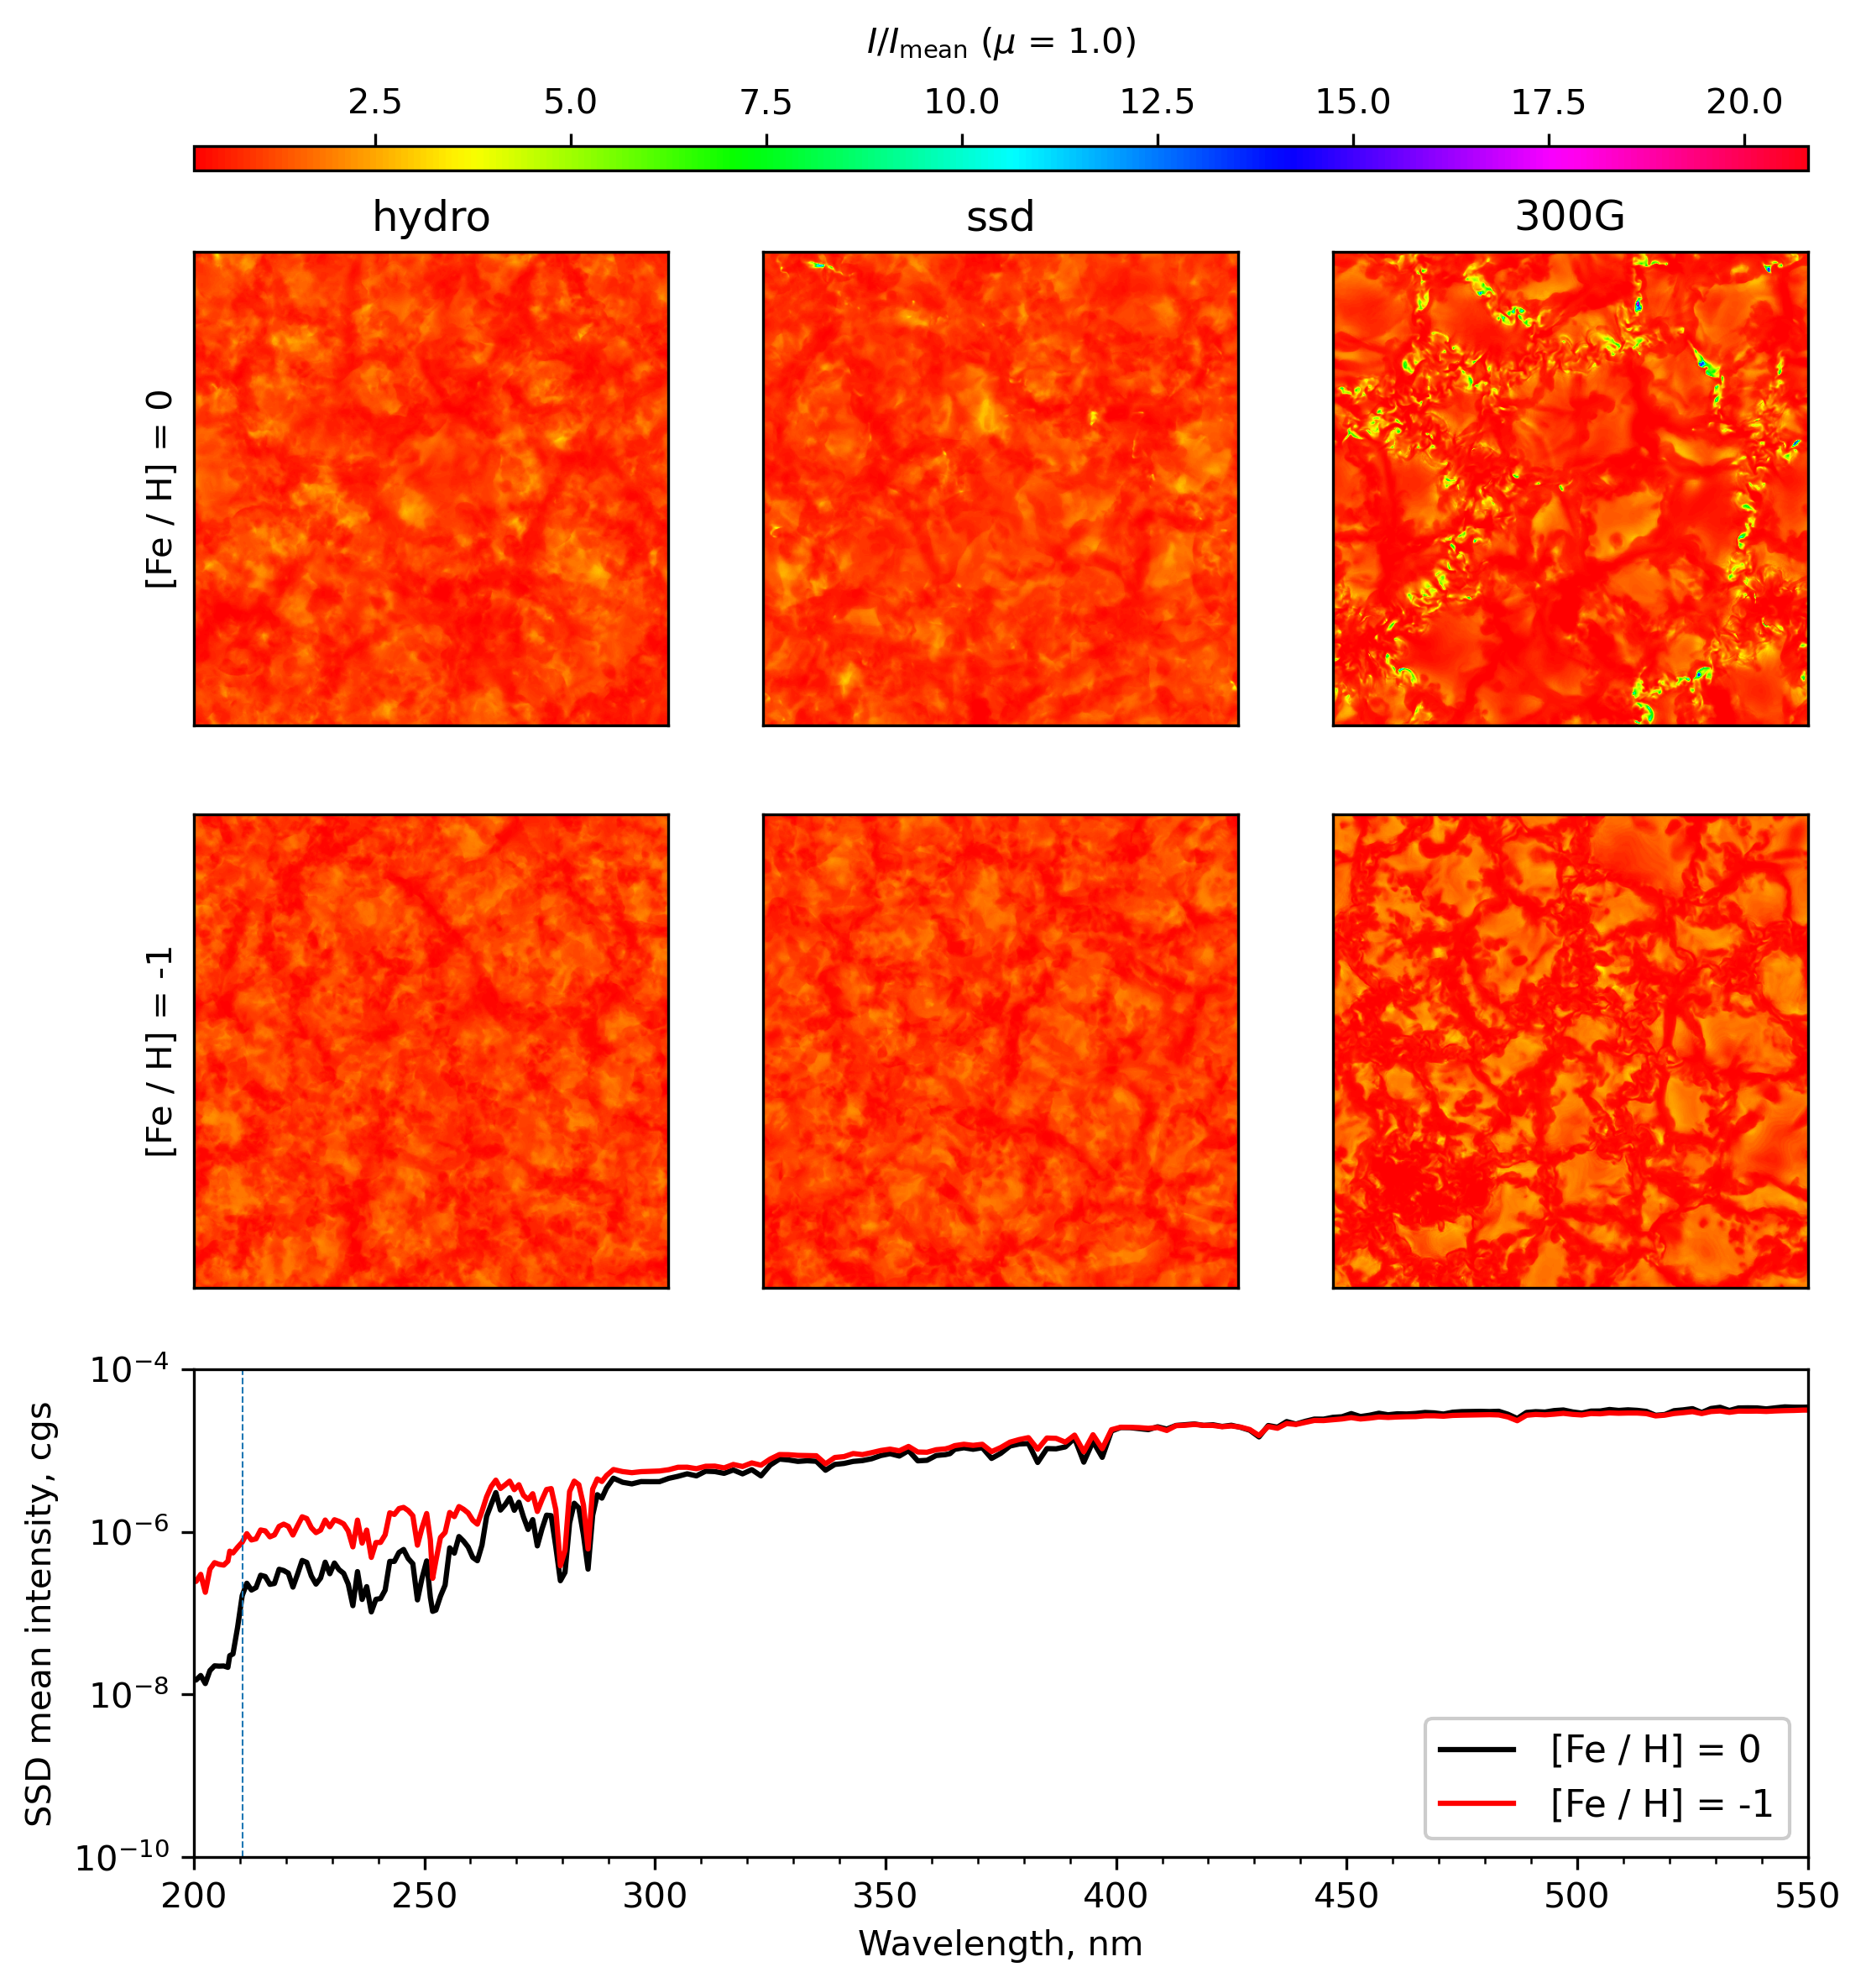

In [4]:
#for widx in tqdm(range(245, 451), desc = 'Plotting'):
#for widx in tqdm(range(245, 246), desc = 'Plotting'):
for widx in range(245, 246):

    plt.close('all')

    fig = plt.figure(dpi = 300)

#    fig.set_size_inches(8.27, 11.69, forward = True)
    fig.set_size_inches(8.27, 9.00, forward = True)

#    gs = gridspec.GridSpec(6, 3, height_ratios = [0.05, 1, 1, 0.05, 1, 1])
    gs = gridspec.GridSpec(4, 3, height_ratios = [0.05, 1, 1, 1])

    intensity_cbar = plt.subplot(gs[0, :])

    hyd_mh0 = plt.subplot(gs[1, 0])
    ssd_mh0 = plt.subplot(gs[1, 1])
    ma3_mh0 = plt.subplot(gs[1, 2])

    hyd_mh1 = plt.subplot(gs[2, 0])
    ssd_mh1 = plt.subplot(gs[2, 1])
    ma3_mh1 = plt.subplot(gs[2, 2])

#    rat_bar = plt.subplot(gs[3, :])
#    hyd_rat_bar = plt.subplot(gs[3, 0])
#    ssd_rat_bar = plt.subplot(gs[3, 1])
#    ma3_rat_bar = plt.subplot(gs[3, 2])

#    hyd_rat = plt.subplot(gs[4, 0])
#    ssd_rat = plt.subplot(gs[4, 1])
#    ma3_rat = plt.subplot(gs[4, 2])

    spec = plt.subplot(gs[3, :])

    hyd_mh0.set_ylim(0, 511)
    ssd_mh0.set_ylim(0, 511)
    ma3_mh0.set_ylim(0, 511)

    hyd_mh1.set_ylim(0, 511)
    ssd_mh1.set_ylim(0, 511)
    ma3_mh1.set_ylim(0, 511)
    
#    hyd_rat.set_ylim(0, 511)
#    ssd_rat.set_ylim(0, 511)
#    ma3_rat.set_ylim(0, 511)

    hyd_mh0.xaxis.set_ticklabels([])
    ssd_mh0.xaxis.set_ticklabels([])
    ma3_mh0.xaxis.set_ticklabels([])

    hyd_mh0.xaxis.set_ticks([])
    ssd_mh0.xaxis.set_ticks([])
    ma3_mh0.xaxis.set_ticks([])

    hyd_mh0.yaxis.set_ticklabels([])
    ssd_mh0.yaxis.set_ticklabels([])
    ma3_mh0.yaxis.set_ticklabels([])

    hyd_mh0.yaxis.set_ticks([])
    ssd_mh0.yaxis.set_ticks([])
    ma3_mh0.yaxis.set_ticks([])

    hyd_mh1.xaxis.set_ticklabels([])
    ssd_mh1.xaxis.set_ticklabels([])
    ma3_mh1.xaxis.set_ticklabels([])

    hyd_mh1.xaxis.set_ticks([])
    ssd_mh1.xaxis.set_ticks([])
    ma3_mh1.xaxis.set_ticks([])

    hyd_mh1.yaxis.set_ticklabels([])
    ssd_mh1.yaxis.set_ticklabels([])
    ma3_mh1.yaxis.set_ticklabels([])

    hyd_mh1.yaxis.set_ticks([])
    ssd_mh1.yaxis.set_ticks([])
    ma3_mh1.yaxis.set_ticks([])

#    hyd_rat.xaxis.set_ticklabels([])
#    ssd_rat.xaxis.set_ticklabels([])
#    ma3_rat.xaxis.set_ticklabels([])

#    hyd_rat.xaxis.set_ticks([])
#    ssd_rat.xaxis.set_ticks([])
#    ma3_rat.xaxis.set_ticks([])

#    hyd_rat.yaxis.set_ticklabels([])
#    ssd_rat.yaxis.set_ticklabels([])
#    ma3_rat.yaxis.set_ticklabels([])

#    hyd_rat.yaxis.set_ticks([])
#    ssd_rat.yaxis.set_ticks([])
#    ma3_rat.yaxis.set_ticks([])

    hyd_mh0.set_title('hydro')
    ssd_mh0.set_title('ssd')
    ma3_mh0.set_title('300G')

    hyd_mh0.set_ylabel('[Fe / H] = 0')
    hyd_mh1.set_ylabel('[Fe / H] = -1')
#    hyd_rat.set_ylabel('mh1 / mh0')

    hyd_mh0_max = np.max(I0m0[:, :, widx])
    ssd_mh0_max = np.max(ISm0[:, :, widx])
    ma3_mh0_max = np.max(I3m0[:, :, widx])

    hyd_mh0_min = np.min(I0m0[:, :, widx])
    ssd_mh0_min = np.min(ISm0[:, :, widx])
    ma3_mh0_min = np.min(I3m0[:, :, widx])

    hyd_mh1_max = np.max(I0m1[:, :, widx])
    ssd_mh1_max = np.max(ISm1[:, :, widx])
    ma3_mh1_max = np.max(I3m1[:, :, widx])

    hyd_mh1_min = np.min(I0m1[:, :, widx])
    ssd_mh1_min = np.min(ISm1[:, :, widx])
    ma3_mh1_min = np.min(I3m1[:, :, widx])

#    hyd_rat_max = np.max(r0[:, :, widx])
#    ssd_rat_max = np.max(rS[:, :, widx])
#    ma3_rat_max = np.max(r3[:, :, widx])

#    hyd_rat_min = np.min(r0[:, :, widx])
#    ssd_rat_min = np.min(rS[:, :, widx])
#    ma3_rat_min = np.min(r3[:, :, widx])

    gmax = max(hyd_mh0_max, ssd_mh0_max, ma3_mh0_max, hyd_mh1_max, ssd_mh1_max, ma3_mh1_max)
    gmin = max(hyd_mh0_min, ssd_mh0_min, ma3_mh0_min, hyd_mh1_min, ssd_mh1_min, ma3_mh1_min)

#    rmax = max(hyd_rat_max, ssd_rat_max, ma3_rat_max)
#    rmin = max(hyd_rat_min, ssd_rat_min, ma3_rat_min)

#    colormap = 'viridis'
    colormap = 'hsv'

    hyd_mh0_img = hyd_mh0.imshow(I0m0[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    ssd_mh0_img = ssd_mh0.imshow(ISm0[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    ma3_mh0_img = ma3_mh0.imshow(I3m0[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)

    hyd_mh1_img = hyd_mh1.imshow(I0m1[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    ssd_mh1_img = ssd_mh1.imshow(ISm1[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    ma3_mh1_img = ma3_mh1.imshow(I3m1[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)

    cb = Colorbar(ax = intensity_cbar, mappable = hyd_mh0_img, orientation = 'horizontal', ticklocation = 'top')
#    cb.set_label(r'Intensity, cgs$\times 10^6$', labelpad = 10)
    cb.set_label(r'$I / I_\mathrm{mean}$ ($\mu$ = ' + str(angle) + ')', labelpad = 10)

#    hyd_rat_img = hyd_rat.imshow(r0[:, :, widx], cmap = colormap, vmin = rmin, vmax = rmax)
#    ssd_rat_img = ssd_rat.imshow(rS[:, :, widx], cmap = colormap, vmin = rmin, vmax = rmax)
#    ma3_rat_img = ma3_rat.imshow(r3[:, :, widx], cmap = colormap, vmin = rmin, vmax = rmax)

#    hyd_rat_img = hyd_rat.imshow(r0[:, :, widx], cmap = colormap)
#    ssd_rat_img = ssd_rat.imshow(rS[:, :, widx], cmap = colormap)
#    ma3_rat_img = ma3_rat.imshow(r3[:, :, widx], cmap = colormap)

#    cb = Colorbar(ax = rat_bar, mappable = hyd_rat_img, orientation = 'horizontal', ticklocation = 'top')
#    cb = Colorbar(ax = hyd_rat_bar, mappable = hyd_rat_img, orientation = 'horizontal', ticklocation = 'top')
#    cb = Colorbar(ax = ssd_rat_bar, mappable = ssd_rat_img, orientation = 'horizontal', ticklocation = 'top')
#    cb = Colorbar(ax = ma3_rat_bar, mappable = ma3_rat_img, orientation = 'horizontal', ticklocation = 'top')

    spec.plot(w, ISm0_m[mu - 2, :], color = 'black', label = '[Fe / H] = 0')
    spec.plot(w, ISm1_m[mu - 2, :], color = 'red',   label = '[Fe / H] = -1')

#    spec.plot(w, I3m0_m[mu - 2, :] * 100, color = 'black')
#    spec.plot(w, I3m1_m[mu - 2, :] * 100, color = 'red')

    spec.axvline(x = w[widx], linewidth = 0.5, linestyle = '--')

    spec.set_xlim(200, 550)
#    spec.set_ylim(1e-8, 1e-2)
    spec.set_ylim(1e-10, 1e-4)

    spec.set_yscale('log')

    spec.set_xlabel('Wavelength, nm')
    spec.set_ylabel('SSD mean intensity, cgs')

    leg = spec.legend(framealpha = 1, loc = 4, handletextpad = 1, prop = {'size': 10.5})

    spec.xaxis.set_major_locator(MultipleLocator(50))
    spec.xaxis.set_minor_locator(AutoMinorLocator(5))

#    spec.text(210, 2e-6, 'ssd')
#    spec.text(210, 2e-4, '300G')

#    plt.savefig('./img/' + mode + '/' + str(mu) + '/' + str(widx + 1) + '.pdf', bbox_inches = 'tight')

    plt.show()

#s = ""

#for widx in range(245, 451):
#for widx in range(245, 246):

#    s += './img/' + mode + '/' + str(mu) + '/' + str(widx + 1) + '.pdf '

#final_pdf = './img/' + mode + '/' + str(mu) + '/all.pdf'

#os.system('pdftk ' + s + 'output ' + final_pdf)